In [232]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns  

from collections import Counter

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

In [233]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [234]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [235]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# 1-Outlier Detection


Q1 = 1.Quartile 25%
Q2 = 2.Quartile 50% (median)
Q3 = 3.Quartile 75%
IQR = Q3 - Q1
Outlier data = (Q1 - 1.5 IQR ) U (Q3 + 1.5 IQR)

In [236]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [237]:
def outlier_detect(feature,data):
    outlier_index = []
    
    for each in feature:
        Q1 = np.percentile(data[each],25)
        Q3 = np.percentile(data[each],75)
        IQR = Q3 -Q1
        outlier_list = data[(data[each] < Q1 - 1.5*IQR) |(data[each] > Q1 + 1.5*IQR)].index
        outlier_index.extend(outlier_list)
            
    outlier_index = Counter(outlier_index)
    outlier_data = list(i for i, v in outlier_index.items() if v > 2)
    return outlier_data

In [238]:
outlier_data = outlier_detect(["Age","SibSp","Parch","Fare"], train_data)
train_data.loc[outlier_data]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.000,C23 C25 C27,S
59,60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.900,NaN,S
71,72,0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.900,NaN,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.000,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.550,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.550,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.550,NaN,S
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.375,B57 B59 B63 B66,C
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.550,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.000,C23 C25 C27,S


In [239]:
#train_data = train_data.drop(outlier_data, axis=0).reset_index(drop=True)

# Combine Test and Train Data

In [240]:
data = pd.concat([train_data, test_data], axis=0).reset_index(drop=True)

3-Feature Analysis
PassengerId : unique id number to each passenger
Survived : passenger survive(1) and died(0)
Pclass : passenger class
Name : name of passenger
Sex : gender of passenger
Age : age of passenger
SibSp : number of siblings/spouse
Parch : number of parent/children
Ticket : ticket number
Fare : amount of money spent on ticket
Cabin : cabin category
Embarked : port where passenger embarked (C= Cherbourg, Q=Quenntown, S = Southampton)
int64(5) : PassengerId, Survived, Pclass, SibSp and Parch
object(5) : Name, Sex, Ticket, Cabin and Embarked
float64(2) : Age and Fare

<AxesSubplot:xlabel='Survived', ylabel='count'>

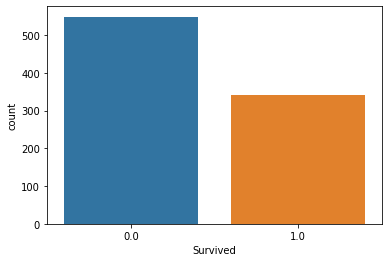

In [241]:
sns.countplot('Survived',data=data )

In [242]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


# Chapter:2 Data Analysis
Feature Analysis
Corelation Between Features

# 1- Feature Analysis
Sex - Survived, Pclass - Survived, Embarked - Survived,SibSp - Survived,Parch - Survived,
Age - Survived,Fare - Survived

Sex - Survived

Female are more likely to survive than male.

In [243]:
data[["Sex", "Survived"]].groupby(["Sex"], as_index = False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


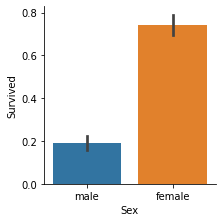

In [244]:
g = sns.factorplot(x="Sex", y ="Survived", data=data, kind="bar", size=3)
plt.show()

# Pclass - Survived

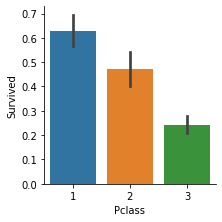

In [245]:
sns.factorplot(x="Pclass", y ="Survived", data=data, kind="bar", size=3)
plt.show()

# Embarked - Survived

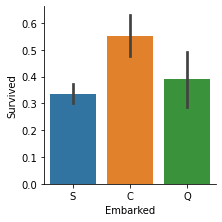

In [246]:
sns.factorplot(x="Embarked", y ="Survived", data=data, kind="bar", size=3)
plt.show()

# SibSp - Survived

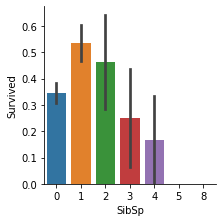

In [247]:
sns.factorplot(x="SibSp", y ="Survived", data=data, kind="bar", size=3)
plt.show()

# Parch - Survived

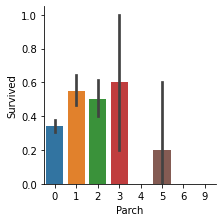

In [248]:
g = sns.factorplot(x="Parch", y ="Survived", data=data, kind="bar", size=3)
plt.show()

#Age - Survived

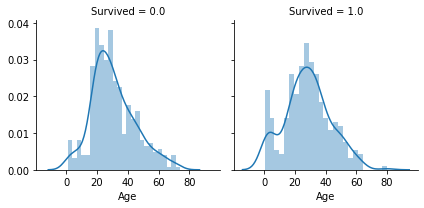

In [249]:
g = sns.FacetGrid(data, col="Survived")
g.map(sns.distplot, "Age", bins=25)
plt.show()

# Fare - Survived¶

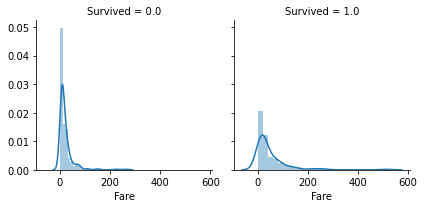

In [250]:
g = sns.FacetGrid(data, col="Survived")
g.map(sns.distplot, "Fare", bins=25)
plt.show()

# 2-Colelation Between Features

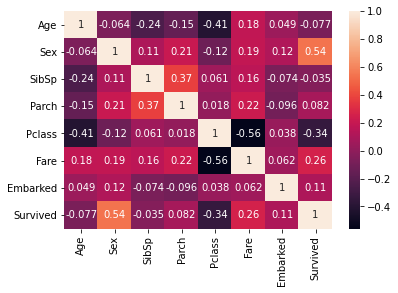

In [251]:
#data["Sex"] = [0 if i == "male" else 1 for i in data["Sex"]]
data['Sex'].replace(['male','female'],[0,1],inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
# male: 0, famela: 1
sns.heatmap(data[["Age","Sex","SibSp","Parch","Pclass","Fare","Embarked", "Survived"]].corr(), annot = True)
plt.show()

Outcome

Sex, Pclass, Fare and Embarked are associated with Survived.


# Chapter-3 Missing Value
Find Missing Value
Fill Missing Value

###### 1-Find Missing Value¶

In [252]:
data.columns[data.isnull().any()]

Index(['Survived', 'Age', 'Fare', 'Cabin', 'Embarked'], dtype='object')

In [253]:
data.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64


# 2-Fill Missing Value
 Cabin has 1014 missing value Age has 263 missing value  Embarked has 2 missing value Fare has 1 missing value

Not: Survived has 418 missing value (only test value)

##### Fare Fill Value

In [254]:
data[data["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1043,1044,NaN,3,"Storey, Mr. Thomas",0,60.5,0,0,3701,NaN,NaN,0.0


In [255]:
data["Fare"] = data["Fare"].fillna(np.mean(data[((data["Pclass"]==3) & (data["Embarked"]==0))]["Fare"]))
data[data["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


Embarked Fill Value

S = 0, C = 1 and Q = 2

In [256]:
data[data["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1.0,1,"Icard, Miss. Amelie",1,38.0,0,0,113572,80.0,B28,NaN
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",1,62.0,0,0,113572,80.0,B28,NaN


In [257]:
data["Embarked"] = data["Embarked"].fillna(1)
data[data["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


#### Age Fill Value¶

In [258]:
data[data["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0.0,3,"Moran, Mr. James",0,NaN,0,0,330877,8.4583,NaN,2.0
17,18,1.0,2,"Williams, Mr. Charles Eugene",0,NaN,0,0,244373,13.0000,NaN,0.0
19,20,1.0,3,"Masselmani, Mrs. Fatima",1,NaN,0,0,2649,7.2250,NaN,1.0
26,27,0.0,3,"Emir, Mr. Farred Chehab",0,NaN,0,0,2631,7.2250,NaN,1.0
28,29,1.0,3,"O'Dwyer, Miss. Ellen ""Nellie""",1,NaN,0,0,330959,7.8792,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1299,1300,NaN,3,"Riordan, Miss. Johanna Hannah""""",1,NaN,0,0,334915,7.7208,NaN,2.0
1301,1302,NaN,3,"Naughton, Miss. Hannah",1,NaN,0,0,365237,7.7500,NaN,2.0
1304,1305,NaN,3,"Spector, Mr. Woolf",0,NaN,0,0,A.5. 3236,8.0500,NaN,0.0
1307,1308,NaN,3,"Ware, Mr. Frederick",0,NaN,0,0,359309,8.0500,NaN,0.0


Chapter-4 Data Engineering
New Feature
Edit Feature
Drop Feature
Normalization


 1-New - Feature
Alone and Family Size
Name - Title
Age Missing Value
Age Limit
 Alone and Family Size

SibSp + Parch = family size
In [28]:


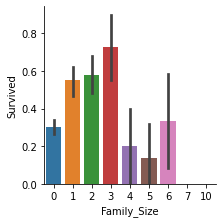

In [259]:
data["Family_Size"] = data["SibSp"] + data["Parch"]
g = sns.factorplot(x="Family_Size", y ="Survived", data=data, kind="bar", size=3)
plt.show()

In [260]:
data["Alone"] = [1 if i == 0 else 0 for i in data["Family_Size"]]

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Alone
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0.0,1,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1.0,1,0
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0,0,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0.0,1,0
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0.0,0,1


In [261]:
data["Family_Size"].replace([0,1,2,3,4,5,6,7,10], [0,1,1,1,0,2,0,2,2], inplace=True)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Alone
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0.0,1,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1.0,1,0
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0,0,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0.0,1,0
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0.0,0,1


### Name - Title¶

In [262]:
data['Title']=data.Name.str.extract('([A-Za-z]+)\.')

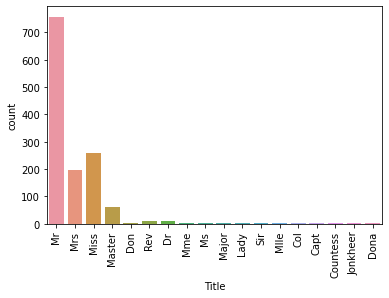

In [263]:
sns.countplot(data["Title"])
plt.xticks(rotation = 90)
plt.show()

In [264]:
data['Title'].replace(['Mme','Ms','Mlle','Lady','Countess','Dona','Dr','Major','Sir','Capt','Don','Rev','Col', 'Jonkheer'],['Miss','Miss','Miss','Mrs','Mrs','Mrs','Mr','Mr','Mr','Mr','Mr','Other','Other','Other'], inplace=True)

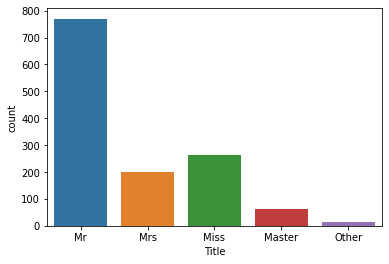

In [265]:
sns.countplot(data["Title"])
plt.show()

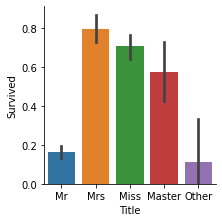

In [266]:
sns.factorplot(x="Title", y ="Survived", data=data, kind="bar", size=3)
plt.show()

In [267]:
data['Fare_Limit']=0
data.loc[data['Fare']<=7.91,'Fare_Limit']=0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454),'Fare_Limit']=1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31),'Fare_Limit']=2
data.loc[(data['Fare']>31)&(data['Fare']<=513),'Fare_Limit']=3

# Age Missing Value¶

<AxesSubplot:>

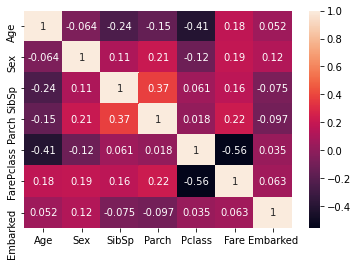

In [268]:
sns.heatmap(data[["Age","Sex","SibSp","Parch","Pclass","Fare","Embarked", "Title"]].corr(), annot = True)

In [269]:
data_age_nan_index = data[data["Age"].isnull()].index
for i in data_age_nan_index:
    mean_age = data["Age"][(data["Pclass"]==data.iloc[i]["Pclass"]) & ((data["Title"]==data.iloc[i]["Title"]))].mean()
    data["Age"].iloc[i] = mean_age

In [270]:
data["Title"].replace([1,2,3,4,5], [1,2,2,3,1], inplace=True)

In [271]:
data["Title"].head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title, dtype: object

In [272]:
#Age Limit

data['Age_Limit']=0
data.loc[data['Age']<=16,'Age_Limit']=0
data.loc[(data['Age']>16)&(data['Age']<=32),'Age_Limit']=1
data.loc[(data['Age']>32)&(data['Age']<=48),'Age_Limit']=2
data.loc[(data['Age']>48)&(data['Age']<=60),'Age_Limit']=3
data.loc[data['Age']>60,'Age_Limit']=4

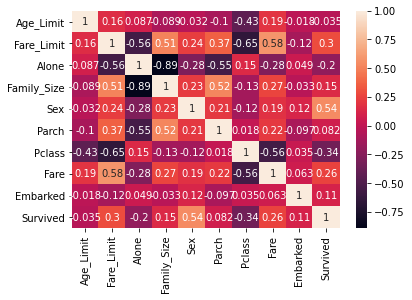

In [273]:
# Corelation Matrix
sns.heatmap(data[["Age_Limit", "Fare_Limit","Alone", "Title","Family_Size","Sex","Parch","Pclass","Fare","Embarked", "Survived"]].corr(), annot = True)
plt.show()

# 2- Drop Features
Ticket, Cabin, Name, PassengerId, Sibsp, Parch and Age are deleted according to the result of the corelation matrix.

In [274]:
data.drop(labels=["Fare", "Ticket","Cabin", "Name", "PassengerId", "Age"], axis=1, inplace = True)
data.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Family_Size,Alone,Title,Fare_Limit,Age_Limit
0,0.0,3,0,1,0,0.0,1,0,Mr,0,1
1,1.0,1,1,1,0,1.0,1,0,Mrs,3,2
2,1.0,3,1,0,0,0.0,0,1,Miss,1,1
3,1.0,1,1,1,0,0.0,1,0,Mrs,3,2
4,0.0,3,0,0,0,0.0,0,1,Mr,1,2


In [275]:
data.drop(labels=["Title"], axis=1, inplace = True)
data.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Family_Size,Alone,Fare_Limit,Age_Limit
0,0.0,3,0,1,0,0.0,1,0,0,1
1,1.0,1,1,1,0,1.0,1,0,3,2
2,1.0,3,1,0,0,0.0,0,1,1,1
3,1.0,1,1,1,0,0.0,1,0,3,2
4,0.0,3,0,0,0,0.0,0,1,1,2


#  3 - One Hot Encoding

In [276]:
data = pd.get_dummies(data,columns=["Pclass"])
data = pd.get_dummies(data,columns=["Sex"])
data = pd.get_dummies(data,columns=["Embarked"])
data = pd.get_dummies(data,columns=["Family_Size"])
data = pd.get_dummies(data,columns=["Alone"])
data = pd.get_dummies(data,columns=["Age_Limit"])
data = pd.get_dummies(data,columns=["Fare_Limit"])


data.head()

,Survived,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,Embarked_0.0,Embarked_1.0,Embarked_2.0,Family_Size_0,Family_Size_1,Family_Size_2,Alone_0,Alone_1,Age_Limit_0,Age_Limit_1,Age_Limit_2,Age_Limit_3,Age_Limit_4,Fare_Limit_0,Fare_Limit_1,Fare_Limit_2,Fare_Limit_3
0,0.0,1,0,0,0,1,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0
1,1.0,1,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1
2,1.0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0
3,1.0,1,0,1,0,0,0,1,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1
4,0.0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0


# 4-Normalization



4-Normalization
Min-max normalization is one of the most common ways to normalize data.
Fare was normalized by the min-max normalized method

In [277]:
#data["Fare"] = (data["Fare"] - np.min(data["Fare"]))/(np.max(data["Fare"]-np.min(data["Fare"])))#

# Chapter:5 Modeling¶

In [278]:
from sklearn.model_selection import train_test_split


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

####### 1-Train Test Split

In [279]:
if len(data) == (len(train_data) + len(test_data)):
    print("success")

success


In [280]:
test = data[len(train_data):]
test.drop(labels="Survived", axis=1, inplace=True)
test

,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,Embarked_0.0,Embarked_1.0,Embarked_2.0,Family_Size_0,Family_Size_1,Family_Size_2,Alone_0,Alone_1,Age_Limit_0,Age_Limit_1,Age_Limit_2,Age_Limit_3,Age_Limit_4,Fare_Limit_0,Fare_Limit_1,Fare_Limit_2,Fare_Limit_3
891,0,0,0,0,1,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0
892,1,0,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0
893,0,0,0,1,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,1,0,0
894,0,0,0,0,1,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0
895,1,1,0,0,1,0,1,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,0,0,0,0,1,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0
1305,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1
1306,0,0,0,0,1,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0
1307,0,0,0,0,1,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0


In [281]:
train = data[:len(train_data)]
X_train = train.drop(labels = "Survived", axis=1)
y_train = train["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.33, random_state=42)

# 2-Classificaiton Methods


2-Classificaiton Methods
Logistic Regression
Random Forest Regression
Support Vector Machine (SVM)
K-Nearest Neighbors (KNN)

##### Logistic Regression

In [282]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
print("Train Accuracy: ", log_reg.score(X_train, y_train))
print("Test Accuracy: ", log_reg.score(X_test,y_test))

Train Accuracy:  0.8087248322147651
Test Accuracy:  0.8169491525423729


In [231]:
X_train.head()

,SibSp,Parch,Title,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,Embarked_0.0,Embarked_1.0,...,Alone_1,Age_Limit_0,Age_Limit_1,Age_Limit_2,Age_Limit_3,Age_Limit_4,Fare_Limit_0,Fare_Limit_1,Fare_Limit_2,Fare_Limit_3
6,0,0,Mr,1,0,0,1,0,1,0,...,1,0,0,0,1,0,0,0,0,1
718,0,0,Mr,0,0,1,1,0,0,0,...,1,0,1,0,0,0,0,0,1,0
685,1,2,Mr,0,1,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,1
73,1,0,Mr,0,0,1,1,0,0,1,...,0,0,1,0,0,0,0,0,1,0
882,0,0,Miss,0,0,1,0,1,1,0,...,1,0,1,0,0,0,0,1,0,0


 # Random Forest Regression

In [283]:
rf_reg = RandomForestClassifier(random_state=42)
rf_reg.fit(X_train, y_train)
print("Train Accuracy: ", rf_reg.score(X_train, y_train))
print("Test Accuracy: ", rf_reg.score(X_test,y_test))

Train Accuracy:  0.889261744966443
Test Accuracy:  0.7728813559322034


### SVM

In [284]:
svm_clsf = SVC()
svm_clsf.fit(X_train, y_train)
print("Train Accuracy: ", svm_clsf.score(X_train, y_train))
print("Test Accuracy: ", svm_clsf.score(X_test,y_test))

Train Accuracy:  0.8053691275167785
Test Accuracy:  0.8169491525423729


## KNN

In [285]:
best_knn = []
for n in range(1,12):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    best_knn.insert(n, knn.score(X_test,y_test))
best_knn

[0.7830508474576271,
 0.7491525423728813,
 0.7796610169491526,
 0.7661016949152543,
 0.7966101694915254,
 0.7932203389830509,
 0.8,
 0.7864406779661017,
 0.8135593220338984,
 0.7966101694915254,
 0.8101694915254237]

In [286]:
knn_clsf = KNeighborsClassifier(n_neighbors=10)
knn_clsf.fit(X_train, y_train)
print("Train Accuracy: ", knn_clsf.score(X_train, y_train))
print("Test Accuracy: ", knn_clsf.score(X_test,y_test))

Train Accuracy:  0.8288590604026845
Test Accuracy:  0.7966101694915254


### 3- Ensemble Modeling

In [287]:
voting_classfication = VotingClassifier(estimators = [('lg', log_reg), ('rfg', rf_reg), ('svc', svm_clsf), ('knn', knn_clsf)], voting="hard", n_jobs=-1)
voting_classfication.fit(X_train, y_train)
print("Train Accuracy: ", voting_classfication.score(X_train, y_train))
print("Test Accuracy: ", voting_classfication.score(X_test,y_test))

Train Accuracy:  0.8506711409395973
Test Accuracy:  0.8


In [288]:
test_result = pd.Series(voting_classfication.predict(test), name = "Survived").astype(int)
results = pd.concat([test_data["PassengerId"], test_result],axis = 1)
results.to_csv("Submission.csv", index = False)

In [289]:
result = pd.read_csv("Submission.csv")

In [290]:
result.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
